In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import datetime as dt
import math
import random
import time
import matplotlib.dates as mdates

In [4]:
Large = pd.read_csv('large.txt', delimiter = " ", header=None)
Large=Large.rename(columns={0: "Date", 1: "action", 2:"stock", 3:"Volume"})

Small = pd.read_csv('small.txt', delimiter = " ", header=None)
Small=Small.rename(columns={0: "Date", 1: "action", 2:"stock", 3:"Volume"})

data_Small = pd.read_csv('final_small.csv')
data_Small = data_Small.drop(columns=['Unnamed: 0'])

data_Large = pd.read_csv('final_large.csv')
data_Large = data_Large.drop(columns=['Unnamed: 0'])

In [5]:
balance_Small=[]
valuation_Small=[]

balance_Large=[]

In [6]:
Sub_data_Small=pd.merge(data_Small, Small, on=("Date","stock"))
Sub_data_Large=pd.merge(data_Large, Large, on=("Date","stock"))

#### SMALL

In [7]:
Sub_data_Small["action"]=Sub_data_Small["action"].astype('str') 
Sub_data_Small["balance"]=0
Sub_data_Small["portfolio"]=0

In [8]:
Sub_data_Small["balance"]=np.where(Sub_data_Small["action"]=="buy-low",(-1)*Sub_data_Small["Volume_y"]*Sub_data_Small["Low"]*1.01,Sub_data_Small["Volume_y"]*Sub_data_Small["High"]*0.99)
Sub_data_Small["balance"]=Sub_data_Small["balance"].cumsum()
Sub_data_Small["balance"]=Sub_data_Small["balance"]+1

In [9]:
Sub_data_Small["portfolio"]=np.where(Sub_data_Small["action"]=="buy-low",Sub_data_Small["Volume_y"]*Sub_data_Small["Close"]*0.99,0)

In [10]:
Plot_Small=Sub_data_Small[["Date","balance","portfolio"]]

In [11]:
Plot_Small

,Date,balance,portfolio
0,1970-01-29,4.738910e-01,5.318280e-01
1,1970-02-03,1.054427e+00,0.000000e+00
2,1970-02-11,4.199450e-01,6.452820e-01
3,1970-02-26,1.127498e+00,0.000000e+00
4,1970-03-24,1.086100e-01,1.015344e+00
...,...,...,...
995,2017-09-18,2.156347e+10,0.000000e+00
996,2017-09-25,2.108148e+10,4.759374e+08
997,2017-10-27,2.164138e+10,0.000000e+00
998,2017-11-03,2.163494e+10,1.680616e+07


In [12]:
Plot_Small['Date'] =  pd.to_datetime(Plot_Small['Date'], format='%Y/%m/%d')

<ipython-input-12-97879081fda7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plot_Small['Date'] =  pd.to_datetime(Plot_Small['Date'], format='%Y/%m/%d')


In [13]:
Plot_Small.set_index('Date', inplace=True)

In [14]:
Plot_Small = Plot_Small.resample('D').ffill().reset_index()

In [15]:
Plot_Small

,Date,balance,portfolio
0,1970-01-29,4.738910e-01,5.318280e-01
1,1970-01-30,4.738910e-01,5.318280e-01
2,1970-01-31,4.738910e-01,5.318280e-01
3,1970-02-01,4.738910e-01,5.318280e-01
4,1970-02-02,4.738910e-01,5.318280e-01
...,...,...,...
17444,2017-11-02,2.164138e+10,0.000000e+00
17445,2017-11-03,2.163494e+10,1.680616e+07
17446,2017-11-04,2.163494e+10,1.680616e+07
17447,2017-11-05,2.163494e+10,1.680616e+07


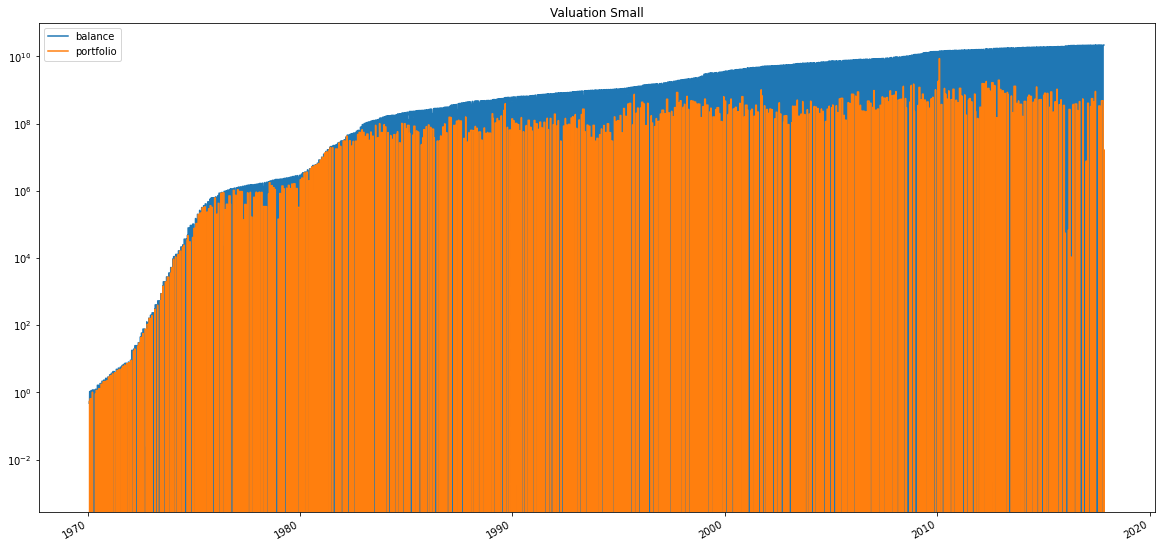

In [24]:
plt.figure(figsize=(20, 10))
x = pd.to_datetime(Plot_Small.Date)

plt.semilogy(x, Plot_Small["balance"])
plt.semilogy(x, Plot_Small["portfolio"])


plt.fill_between(Plot_Small.Date, Plot_Small["balance"])
plt.gcf().autofmt_xdate()
plt.gcf().axes[0].xaxis_date()
plt.gca().legend(('balance','portfolio'))
plt.title("Valuation Small")
plt.savefig('C:/Users/User/Desktop/time-travel/Diagram_Small.png')
plt.show()

#### LARGE

In [320]:
Sub_data_Large["action"]=Sub_data_Large["action"].astype('str') 
Sub_data_Large["balance"]=0

In [321]:
Sub_data_Large

,Date,Open,High,Low,Close,Volume_x,stock,OP_HI,LO_CL,profit,action,Volume_y,balance
0,1970-01-02,0.7383,0.7538,0.7383,0.7538,8378.7,CVX,0.000579,0.000579,0.000579,buy-open,1,0
1,1970-01-02,0.7383,0.7538,0.7383,0.7538,8378.7,CVX,0.000579,0.000579,0.000579,sell-high,1,0
2,1970-01-05,0.7538,0.7696,0.7538,0.7617,17852.7,CVX,0.000566,-0.007255,0.000566,buy-open,1,0
3,1970-01-05,0.7538,0.7696,0.7538,0.7617,17852.7,CVX,0.000566,-0.007255,0.000566,sell-high,1,0
4,1970-01-08,0.7538,0.7696,0.7538,0.7617,10110.8,CVX,0.000566,-0.007255,0.000566,buy-open,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888437,2017-11-10,155.0000,158.8000,155.0000,158.4500,20510.7,VMI,0.662000,0.315500,0.662000,sell-high,20510,0
888438,2017-11-10,213.6000,221.6700,213.3000,221.0500,115944.8,ANET,3.717300,3.406500,3.717300,buy-open,115944,0
888439,2017-11-10,213.6000,221.6700,213.3000,221.0500,115944.8,ANET,3.717300,3.406500,3.717300,sell-high,115944,0
888440,2017-11-10,8.6384,10.4900,8.6100,10.4900,6652.0,GTXI,1.660316,1.689000,1.689000,buy-low,6652,0


In [322]:
Sub_data_Large["balance"]=np.where(Sub_data_Large["action"]=="buy-open",-1*Sub_data_Large["Volume_y"]*Sub_data_Large["Open"]*1.01,
                                   (np.where(Sub_data_Large["action"]=="sell-high",Sub_data_Large["Volume_y"]*Sub_data_Large["High"]*0.99,
                                            (np.where(Sub_data_Large["action"]=="buy-low",-1*Sub_data_Large["Volume_y"]*Sub_data_Large["Low"]*1.01,Sub_data_Large["Volume_y"]*Sub_data_Large["Close"]*0.99)))))

In [323]:
Sub_data_Large

,Date,Open,High,Low,Close,Volume_x,stock,OP_HI,LO_CL,profit,action,Volume_y,balance
0,1970-01-02,0.7383,0.7538,0.7383,0.7538,8378.7,CVX,0.000579,0.000579,0.000579,buy-open,1,-7.456830e-01
1,1970-01-02,0.7383,0.7538,0.7383,0.7538,8378.7,CVX,0.000579,0.000579,0.000579,sell-high,1,7.462620e-01
2,1970-01-05,0.7538,0.7696,0.7538,0.7617,17852.7,CVX,0.000566,-0.007255,0.000566,buy-open,1,-7.613380e-01
3,1970-01-05,0.7538,0.7696,0.7538,0.7617,17852.7,CVX,0.000566,-0.007255,0.000566,sell-high,1,7.619040e-01
4,1970-01-08,0.7538,0.7696,0.7538,0.7617,10110.8,CVX,0.000566,-0.007255,0.000566,buy-open,1,-7.613380e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888437,2017-11-10,155.0000,158.8000,155.0000,158.4500,20510.7,VMI,0.662000,0.315500,0.662000,sell-high,20510,3.224418e+06
888438,2017-11-10,213.6000,221.6700,213.3000,221.0500,115944.8,ANET,3.717300,3.406500,3.717300,buy-open,115944,-2.501329e+07
888439,2017-11-10,213.6000,221.6700,213.3000,221.0500,115944.8,ANET,3.717300,3.406500,3.717300,sell-high,115944,2.544429e+07
888440,2017-11-10,8.6384,10.4900,8.6100,10.4900,6652.0,GTXI,1.660316,1.689000,1.689000,buy-low,6652,-5.784646e+04


In [324]:
Plot_Large=Sub_data_Large[["Date","balance"]]
Plot_Large=Plot_Large.groupby(['Date']).sum().reset_index()

In [325]:
Plot_Large

,Date,balance
0,1970-01-02,5.790000e-04
1,1970-01-05,5.660000e-04
2,1970-01-08,5.660000e-04
3,1970-01-14,4.211000e-03
4,1970-01-20,4.783000e-03
...,...,...
11092,2017-11-06,5.628861e+07
11093,2017-11-07,1.901069e+07
11094,2017-11-08,3.888509e+07
11095,2017-11-09,4.791019e+07


In [326]:
Plot_Large["balance"]=Plot_Large["balance"].cumsum()
Plot_Large["balance"]=Plot_Large["balance"]+1

In [327]:
Plot_Large

,Date,balance
0,1970-01-02,1.000579e+00
1,1970-01-05,1.001145e+00
2,1970-01-08,1.001711e+00
3,1970-01-14,1.005922e+00
4,1970-01-20,1.010705e+00
...,...,...
11092,2017-11-06,1.216388e+11
11093,2017-11-07,1.216578e+11
11094,2017-11-08,1.216967e+11
11095,2017-11-09,1.217446e+11


In [328]:
Plot_Large['Date'] =  pd.to_datetime(Plot_Large['Date'], format='%Y/%m/%d')

In [329]:
Plot_Large.set_index('Date', inplace=True)

In [330]:
Plot_Large = Plot_Large.resample('D').ffill().reset_index()

In [331]:
Plot_Large

,Date,balance
0,1970-01-02,1.000579e+00
1,1970-01-03,1.000579e+00
2,1970-01-04,1.000579e+00
3,1970-01-05,1.001145e+00
4,1970-01-06,1.001145e+00
...,...,...
17475,2017-11-06,1.216388e+11
17476,2017-11-07,1.216578e+11
17477,2017-11-08,1.216967e+11
17478,2017-11-09,1.217446e+11


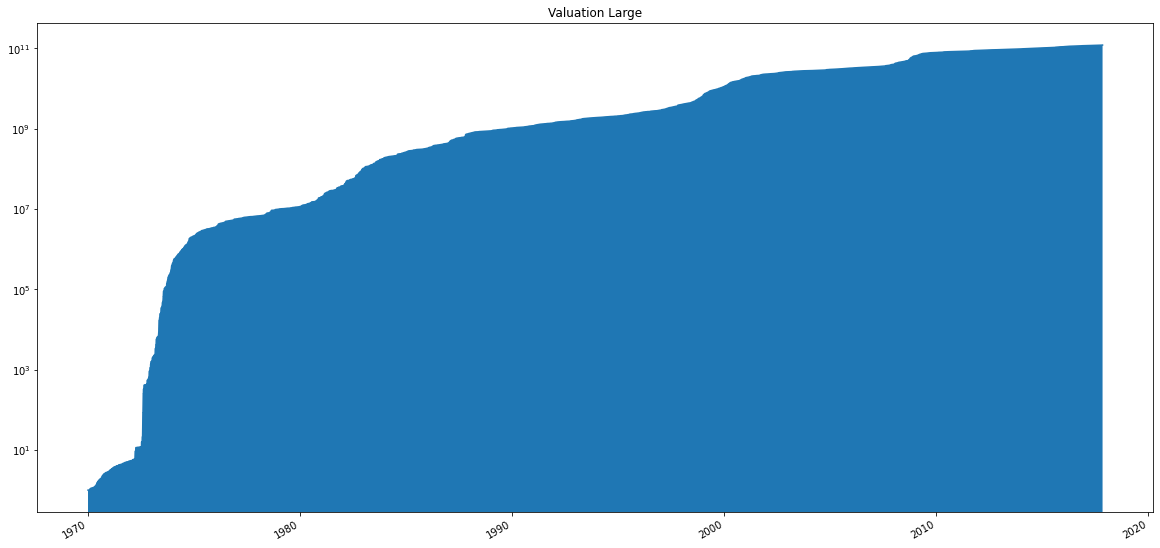

In [332]:
plt.figure(figsize=(20, 10))
x = pd.to_datetime(Plot_Large.Date)

plt.semilogy(x, Plot_Large["balance"])


plt.fill_between(Plot_Large.Date, Plot_Large["balance"])
plt.gcf().autofmt_xdate()
plt.gcf().axes[0].xaxis_date()
plt.title("Valuation Large")
plt.savefig('C:/Users/User/Desktop/time-travel/Diagram_Large.png')
plt.show()